<img src="hs.png" width="200">

# Otvaranje i zatvaranje datoteka

U ovom ćemo notebooku naučiti kako otvarati i zatvarati fileove u Pythonu. Svako programiranje je u svojoj biti *parsing*: neki file se otvori, raskomadaju se podatci i modificiraju, sasatave se u neki oblik, i zatim se spreme u neki drugi file (ili u isti tako da prebrišu stare vrijednosti). Dobro je misliti o svakom zadatku u programiranju na ovaj način.

Treba nam neki početni file kojeg ćemo generirati sljedećim kodom:

In [ ]:
prvaDatoteka=open("prviPodatci.json","w")
sadrzaj='[{"ime": "Ana","visina":156}, {"ime": "Branimir", "visina": 189}, {"ime": "Coco", "visina": 176}]'
prvaDatoteka.writelines(sadrzaj)
prvaDatoteka.close()

Ovime smo napravili sljedeće: 

* inicijalizirali u varijablu **prvaDatoteka** novi file s imenom **prviPodatci.json**, i otvorili ga za pisanje (to je **'w'**).
* u varijablu **sadrzaj** pohranili string (koji je nastao iz validnog JSON-a odnosno Python rječnika-- to je dio između '...')
* u **prvaDatoteka** smo upisali **sadrzaj**
* zatvorili smo file **prvaDatoteka**

Sada možemo učitati **prviPodatci.json** da vidimo da smo dobro napravili sve (napomena: ovi svi fileovi moraju biti u istom direktoriju kao i ovaj notebook. Ako se želi neki drugi direktorij, mora se specificirati putanja, ali tu pripazite oko specifikacije Windows/Linux puteva)

In [ ]:
otvoreniFile=open("prviPodatci.json","r")
sadrzajFilea=otvoreniFile.readlines()
print(sadrzajFilea)

Uočimo da smo dobili ne samo početni JSON, nego listu koja sadrži taj JSON ali kao string. Lista je nastala zato što smo koristili metodu **readlines** koja svaki redak u fileu pročita kao string i onda te stringove puni u listu. Ovo je inače vrlo stabilna i korisna metoda, ali nam ovdje uzrokuje komplikacije koje ćemo morati ručno izbjeći (naš file ima samo jednu liniju, što nije uobičajeno, a ta linija je JSON kojeg želimo prepoznati kao dictionary, što takoder nije prečesto)

In [ ]:
otvoreniFile=open("prviPodatci.json","r")
sadrzajFilea=otvoreniFile.readlines()
print(eval(sadrzajFilea[0]))

Uočimo da smo za čitanje koristili **"r"** prilikom otvaranja. Sada ćemo napraviti nešto složenije. Želimo za početak naći najvišlju osobu među podatcima koje imamo:

In [ ]:
#definicija funkcije koja bira maksimum po visini, a vraca ime (a ne visinu) te osobe (odnosno tog clana JSONa)
def najvislji(pod):
    visina=[x["visina"] for x in pod]
    ime=[x["ime"] for x in pod]
    clan=max(visina)
    
    lokacija=visina.index(clan) 
    
    return ime[lokacija]

#otvaranje filea
otvoreniFile=open("prviPodatci.json","r")
sadrzajFilea=otvoreniFile.readlines()
podatci=eval(sadrzajFilea[0])

najvisljaOsoba=najvislji(podatci)
 
print(najvisljaOsoba)

Sada si uzimamo novi zadatak, i želimo stvoriti novi file sličan početnom, ali sa visinama u inchima (1 inch = 2.5 cm):

In [ ]:
#---------GLOBALNE VARIJABLE-----------
inch=2.5
#--------------------------------------

#Otvaranje prvog filea
fh=open("prviPodatci.json","r")
sadrzaj=fh.readlines()
fh.close()
sadrzaj1=eval(sadrzaj[0])

#Parsing, transformacija u inche i ponovno sastavljanje novog JSONa
rezultat=[]
for i in sadrzaj1:
    staraVis=i["visina"]#Ovdje se u varijablu staraVis ucitava vrijednost uz kljuc "visina" pojedinog clana i iz pocetnog JSONa
    novaVis=staraVis/inch
    i["visina"]=novaVis#Ovdje se uz kljuc "visina" u clan i stavlja vrijednost koja je pohranjena u varijablu novaVis
    rezultat.append(i)    

#zapisivanje novog JSONa u novi file    
finrez=[str(rezultat)]
fh=open("noviPodatci.json","w")
fh.writelines(finrez)
fh.close()

Sada trebamo prekontrolirati je li file **noviPodatci.json** dobro napravljen, pa ćemo ga učitati i isprintati:

In [ ]:
otvoreniFile=open("noviPodatci.json","r")
sadrzajFilea=otvoreniFile.readlines()
print(eval(sadrzajFilea[0]))

# Pandas i otvaranje CSV-a kao DataFrame

U prethodnom dijelu smo vidjeli kako možemo otvoriti i pohraniti file u čistom Pythonu, a sad ćemo vidjeti kako CSV (ili JSON) file možemo učitati uz pomoć Pandas paketa. Pandas učitava dobro formatirane fileove (poput CSV ili JSON), ili pak Python liste i rječnike u svoj interni format koji se naziva *dataframe*. Dataframe je tablica u kojoj se može formatirati podatke, dodavati ili brisati stupce illi retke, ili pak pretvoriti u neku drugu strukturu podataka poput Numpy array ili listu.

Podatke iz CSV-a učitavamo na sljedeći način, pri čemu prvo učitavamo paket Pandas. Paket će ostati učitani dok je kod/notebook aktivan, pa ga zato treba učitati samo jednom unutar nekog filea s kodom (isto vrijedi za sve pakete).


In [ ]:
import pandas as pd
podatci = pd.read_csv("podatci_s.csv")

Ako želimo ispisati prvih 7 redaka, koristimo sljedeću naredbu

In [ ]:
podatci.head(7)

Ako želimo izbaciti neki stupac, to radimo na sljedeći način

In [ ]:
podatci_cisti = podatci.drop('customer_id',axis=1)
podatci_cisti.head()

Ako od postojećeg dataframea želimo stvoriti novi koji ima samo AGE i PRICE, koristimo sljedeću sintaksu:

In [ ]:
svojstva = podatci_cisti[["age","price"]]
svojstva.head()

## Pandas u Numpy
Načelno, svi Pandas dataframeovi su ujedno i Numpy arrayevi, no mogu se i direktno konvertirati:

In [ ]:
# Stvorimo neki testni Dataframe
testni_df = pd.DataFrame(data={'Prvi': [1, 2, 3], 'Drugi': [4, 5, 6], 'Treci': [7, 8, 9]}, 
                  index=['a', 'b', 'c'])

Ako treba konvertirati cijeli dataframe:

In [ ]:
testni_df.to_numpy()

Ako treba konvertirati određene stupce

In [ ]:
testni_df[['Prvi', 'Treci']].to_numpy()

## Numpy u Pandas
Ako treba pretvoriti Numpy array u Pandas dataframe, to radimo ovako:

In [ ]:
import numpy as np
import pandas as pd
moj_array = np.array([[11, 22, 33], [44, 55, 66]])
novi_df = pd.DataFrame(moj_array, columns=['stupac_A', 'stupac_B', 'stupac_C'], index=['predmet_1', 'predmet_2'])
novi_df

# Crtanje grafova

U Pythonu se grafovi crtaju najčešće uz pomoć paketa Matplotlib, koji je kao i Pandas dio Anacoda distribucije. Prvo ćemo učitati Numpy i Matplotlib:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Zatim cemo definirati dvije stvari, funkciju i prostor varijable. Za funkciju možemo uzeti bilo koju funkciju, mi ćemo uzeti:

$$f(x) = 2x^3 + 3$$

Prostor varijable govori Pythonu od koje do koje vrijednosti $x$ evaluira funkciju $f(x)$. Mi ćemo uzeti od -10 do 10, s time da treba imati na umu da u Pythonu treba prvo definirati prostor varijable, a zatim funkciju, jer će se inače Python buniti da je $x$ nedefiniran.

In [ ]:
x = np.linspace(-10,10,200)
fx = 2 * x**3 + 3

In [ ]:
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.grid()
plt.plot(x,fx)

Ako trebamo više funkcija radimo sljedeće:

In [ ]:
x = np.linspace(-10,10,200) #ovaj 200 znači koliko točaka između dvije disketne vrijednosti x će printati. 
#                            Isprobajte samo sa tangensom 10 i 100000. 
fx = x**2 - 10
fx2 = np.log(x) + np.pi
fx3 = np.sin(x)*x
fx4 = np.tan(x)



plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.grid()
plt.plot(x,fx, label="kvadratna")
plt.plot(x,fx2, label="prirodno-logaritamska")
plt.plot(x,fx3, label="sinus")
plt.plot(x,fx4, label="čudan tangens")


plt.legend()

Možemo napraviti i puno složenije grafove:

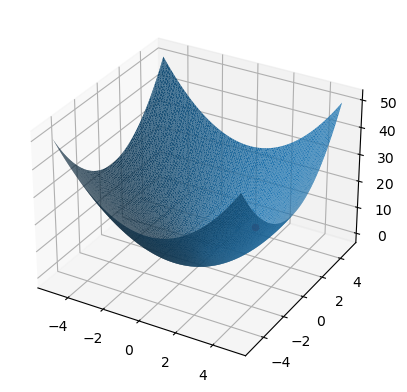

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

line = np.linspace(-5,5,100)
xx, yy = np.meshgrid(line, line)
grid = np.vstack((xx.flatten(),yy.flatten())).T
x_values = grid[:,0]
y_values = grid[:,1]
z_values = x_values ** 2 + y_values ** 2

fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.plot_trisurf(x_values, y_values, z_values, linewidth=0.2, antialiased=True)
                
ax.scatter([2],[2],[8], c="red")